# A Journey to the Tip of Neural Networks

Author: Don Kim ([github.com/dgkim5360](//github.com/dgkim5360))  
Originally uploaded to [the Github repository](//github.com/dgkim5360/the-elements-of-statistical-learning-notebooks). 

This notebook aims to learn the gist of neural networks, taking the basic flow of the machine learning course step-by-step. I here try to delivery the idea of "what the neural networks do", minimizing the address of "how to compute/implement". The main reference is the famous textbook "The Elements of Statistical Learning", the second edition by Hastie et al.

However this notebook contains implementations anyway. For example, the Newton-Raphson algorithm for logistic regression is not explained here. Please consult with any textbook for the algorithmic/implementational details.

### Outline

1. Supervised Learning, Regression
  * Linear Regression
  * Basis Expansion
1. Supervised Learning, Classification
  * Linear Regression, Again
  * Logistic Regression
1. Finally, Neural Networks
  * Make It Simple, Stupid
  * Activation vs. Basis Expansion
  * Implementation with PyTorch

In [1]:
import csv
import scipy
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supervised Learning, Regression

In the supervised learning problem, we would like to earn a function $f$, which predicts the output $Y$ from the input $X$.

\begin{equation}
Y = f(X)
\end{equation}

The $f$ is referred to as the _regression function_, and this supervised learning problem is also known as _function approximation_ in the field of mathematics.

The supervised learning typically proceeds as follows: Compute $\hat{f}$ from the training data $(\mathbf{X}, \mathbf{y})$ with whatever method, and then bring the test data and test it (how good the $\hat{f}$ is?). Yes, the supervised learning requires $\mathbf{y}$!

Since, of course, it is extremely difficult to do such task without a clue, we simplify the situation by enchanting $f$ with a special property.

## Linear Regression

The most absurd assumption is that $f$ is linear.

With $X \in \mathbb{R}^p$ and $Y \in \mathbb{R}$, we can write the linear regression function as

\begin{align}
Y &= f(X) \\
&= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p \\
&= \beta^T X,
\end{align}

where, for brevity, $X$ and $\beta$ are $(p+1)$-vector containing the intercept, respectively.
* $\beta^T = [\beta_0, \beta_1, \cdots, \beta_p]$
* $X^T = [1, X_1, \cdots, X_p]$

Now estimating $f$ comes equivalent with finding $\beta$. Exaggeratingly speaking, linear regression is that __you see the point cloud and draw your proper straight line__. The linear regression fit $\hat{f}$ is computed by the least squares, which is not covered here.

### 1D Example

Here goes the simplest example.

\begin{equation}
Y = \beta_0 + \beta_1 X
\end{equation}

Y = 0.134215 + 0.009011X


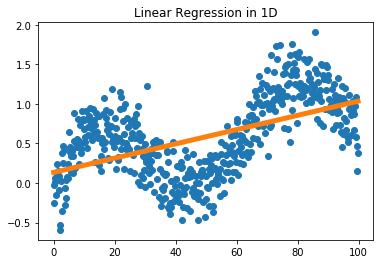

In [2]:
"""The simplest example for 1D linear regression"""
# Generate data (sine-like wave)
sample_size = 500
sample_x = scipy.arange(0, 100, 100/sample_size)
sample_y_true = scipy.sin(sample_x/10)/2 + sample_x*.01
sample_y = sample_y_true + scipy.randn(sample_size)/4

# Plot the data
fig0 = plt.figure(0)
ax0 = fig0.add_subplot(1, 1, 1)
ax0.plot(sample_x, sample_y, 'o')

# Implementation for the 1D linear regression
mat_1x = scipy.vstack((scipy.ones(sample_size), sample_x)).T
hat_beta = scipy.linalg.solve((mat_1x.T @ mat_1x),
                              (mat_1x.T @ sample_y))

# Compute the fit
hat_y = mat_1x @ hat_beta

# Plot the fit
ax0.plot(sample_x, hat_y, linewidth=5)
ax0.set_title('Linear Regression in 1D')
print('Y = {:5f} + {:5f}X'.format(*hat_beta))

From the above picture, the computed straight line looks either good or bad.
1. Does the line explains the original data? Bad.  
  We actually did wrong with picking the model, since we saw the curvy data but fit with the straight line. (High bias)
1. How well does the line predict a new data? Good. (Low variance)

The straight line is simple, and __simple is good__, because
* it makes the computation easier,
* it makes the interpretation easier, and
* it works well with the scarse data.

Furthermore, we can exploit the linear regression beyond the straight line.

### Polynomial Regression

A reason why many textbooks primarily deal with the linear regression is that it allows us to fit in more complex way with the same method.

The idea is simple. Assume we want to fit a quadratic curve instead of a straight line. Then we change the original linear model

\begin{equation}
Y = \beta_0 + \beta_1 X
\end{equation}

to the quadratic model by adding the quadratic term as

\begin{equation}
Y = \beta_0 + \beta_1 X + \beta_2 X^2.
\end{equation}

To get the estimate of $\beta_0, \beta_1, \beta_2$, the corresponding training data change in the same way

\begin{equation}
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N
\end{bmatrix} \quad\Longrightarrow\quad
\mathbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix},
\end{equation}

and the final computation is done with the plain linear regression.

Y = 0.446910 + -0.009827X + 0.000189X^2
Y = 0.652270 + -0.034643X + 0.000811X^2 + -0.000004X^3


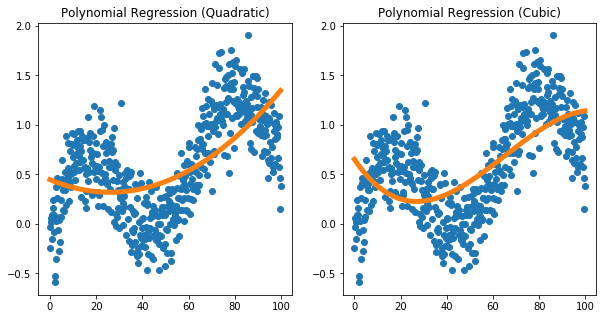

In [3]:
"""1D polynomial regression"""
# Plot the data
fig1 = plt.figure(1, figsize=(10, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax11.plot(sample_x, sample_y, 'o')
ax12 = fig1.add_subplot(1, 2, 2)
ax12.plot(sample_x, sample_y, 'o')

# Implementation for the 1D polynomial regression (quadratic/cubic)
mat_1x2 = scipy.vstack((scipy.ones(sample_size),
                        sample_x, sample_x*sample_x)).T
hat_beta2 = scipy.linalg.solve((mat_1x2.T @ mat_1x2),
                               (mat_1x2.T @ sample_y))
mat_1x3 = scipy.hstack((mat_1x2,
                        (sample_x*sample_x*sample_x).reshape(-1, 1)))
hat_beta3 = scipy.linalg.solve((mat_1x3.T @ mat_1x3),
                               (mat_1x3.T @ sample_y))

# Compute the fits
hat_y2 = mat_1x2 @ hat_beta2
hat_y3 = mat_1x3 @ hat_beta3

# Plot the fit
ax11.plot(sample_x, hat_y2, linewidth=5)
ax11.set_title('Polynomial Regression (Quadratic)')
ax12.plot(sample_x, hat_y3, linewidth=5)
ax12.set_title('Polynomial Regression (Cubic)')
print('Y = {:5f} + {:5f}X + {:5f}X^2'.format(*hat_beta2))
print('Y = {:5f} + {:5f}X + {:5f}X^2 + {:5f}X^3'.format(*hat_beta3))

Y = + 0.009796X + 0.517065sin(X)


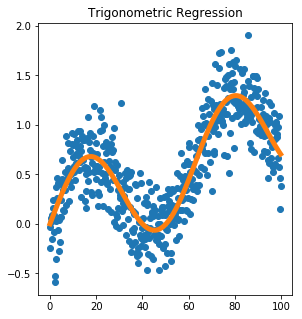

In [4]:
"""Bonus, this is never gonna happen in reality."""
# Plot the data
fig100 = plt.figure(100, figsize=(10, 5))
ax100 = fig100.add_subplot(1, 2, 1)
ax100.plot(sample_x, sample_y, 'o')

# Implementation for the 1D polynomial regression (quadratic/cubic)
mat_sinx = scipy.vstack((sample_x,
                         scipy.sin(sample_x/10))).T

hat_beta100 = scipy.linalg.solve((mat_sinx.T @ mat_sinx),
                                 (mat_sinx.T @ sample_y))

# Compute the fits
hat_y100 = mat_sinx @ hat_beta100

# Plot the fit
ax100.plot(sample_x, hat_y100, linewidth=5)
ax100.set_title('Trigonometric Regression')
print('Y = + {:5f}X + {:5f}sin(X)'.format(*hat_beta100))

We can fit the higher-order polynomial fit in this way, with the plain linear regression (fitting the sine wave is still hard though).

In summary, whatever variables come in (e.g. $X^2$ or $e^X$), the linear regression only aims to compute their linear coefficients. This is the idea of the _basis expansion_.

## Basis Expansion

Let's name the transformation which takes input $X \in \mathbb{R}^p$ and output a real number with $h$:

\begin{equation}
h: \mathbb{R}^p \mapsto \mathbb{R}
\end{equation}

Then the linear basis expansion model is written as

\begin{equation}
f(X) = \sum_{m=1}^M \beta_m h_m(X).
\end{equation}

Below are some examples of the basis expansion for easy understanding.

* If $h_m(X) = X_m$ for all $m$, it comes down to the linear regression model.
* Additional higher-order variables make the polynomial regression model.
* You can add some nonlinear ones like $\log X$ or $\exp X$ if you wish.

We can add variables not only introducing new data, but also restricting the existing data.

* Setting $h_m(X) = I(L_m \le X_k \lt U_m)$ with some constants $L_m$ and $U_m$ allows the model to deal with the data only within some windows or intervals.

And __we can mix all such variables__.

For your information, $I$ is called the indicator function, returning 0 or 1 depending on the conditional expression.

\begin{equation}
I(\text{expression}) = \begin{cases}1 & \text{if expression is true}, \\ 0 & \text{otherwise}\end{cases}
\end{equation}

### 1D Example

Here we briefly check the _natural cubic spline_, which is quite a popular method of basis expansion. As the name depicts itself, the model is 3rd-order polynomial, with additional properties:
1. Split the domain of $X$, and fit each split region with the cubic curve.  
  The splitting points are called as _knots_.
1. The function values at knots should coincide.  
  The first and second derivatives of the function values at knots should also coincide.
1. Assume the fit is linear outside of boundary knots.

The natural cubic spline restricts such things in order to make the fit "natural". Also note that the boundary linear assumption is due to the difficulty of fitting boundaries.

Although it is worth learning what the natural cubic spline is, it is more important to understand the idea of basis expansion that ultimately boils the model down to solving linear regression problem with whatever variables we compose.

Text(0.5,1,'Natural Cubic Spline')

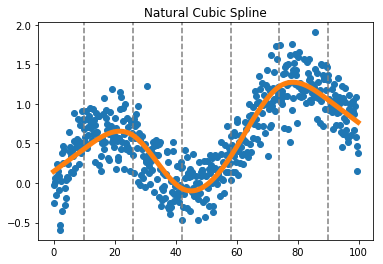

In [5]:
"""Natural cubic spline with 6 knots"""
def d(x: scipy.ndarray, knots: scipy.ndarray, k: int)->scipy.ndarray:
    return (scipy.where(x < knots[k], 0, (x-knots[k])**3)
            - scipy.where(x < knots[-1], 0, (x-knots[-1])**3))/(knots[-1]-knots[k])

# Construct H
knots = scipy.array([.1, .26, .42, .58, .74, .9])*100

h1 = scipy.ones_like(sample_x)
h2 = scipy.copy(sample_x)
h3 = d(sample_x, knots, 0) - d(sample_x, knots, -2)
h4 = d(sample_x, knots, 1) - d(sample_x, knots, -2)
h5 = d(sample_x, knots, 2) - d(sample_x, knots, -2)
h6 = d(sample_x, knots, 3) - d(sample_x, knots, -2)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

# Linear regression
hat_beta_spl = scipy.linalg.solve(H.T @ H, H.T @ sample_y)
hat_y_spl = H @ hat_beta_spl

# Plot
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(sample_x, sample_y, 'o')
y0, y1 = ax2.get_ylim()

for knot in knots:
    ax2.plot([knot, knot], [y0, y1], '--', color='gray')
ax2.set_ylim(y0, y1)
ax2.plot(sample_x, hat_y_spl, linewidth=5)
ax2.set_title('Natural Cubic Spline')

Above is a gorgeous estimation fit.

There is one difficulty for the basis expansion: We must decide $h_m$'s to be used. Note that the natural cubic spline resolves the difficulty with fixing the model as the cubic polynomial, but one should decide the location and number of the knots.

# Supervised Learning, Classification

The regression problem is basically a good way to predict a continuous output $Y$. And it is OK to use a discrete $Y$ for the regression problem.

A discrete $Y$ leads the problem to the classification. For example, "whether $Y$ is 0 or 1" can come from "whether $Y$ is a human or a animal" or "whether $Y$ has desease or not" or any scenario.

## Linear Regression, Again

Below is a 2D example of the binary $Y$. The lengthy code is due to the data generation and visualization in 2D and 3D, but the code for the actual computation is quite short.

In [6]:
"""2D data with 0/1 response, an example for classification"""
def generate_data(sample_size: int)->tuple:
    """Reference: ESL Chapter 2"""
    # Parameters for mean distributions
    mean_blue = (1, 0)
    mean_orange = (0, 1)
    mean_cov = scipy.eye(2)*2
    mean_size = 10
    sample_size //= 2
    
    # Additional parameters for blue and orange distributions
    sample_cov = scipy.eye(2)/4
    
    # Generate mean components for blue and orange (10 means for each)
    sample_blue_mean = scipy.random.multivariate_normal(mean_blue,
                                                        mean_cov,
                                                        mean_size)
    sample_orange_mean = scipy.random.multivariate_normal(mean_orange,
                                                          mean_cov,
                                                          mean_size)
    
    # Generate blue points
    sample_blue = scipy.array([
        scipy.random.multivariate_normal(
            sample_blue_mean[scipy.random.randint(0, 10)],
            sample_cov
        ) for _ in range(sample_size)
    ])
    y_blue = scipy.zeros(sample_size)

    # Generate orange points
    sample_orange = scipy.array([
        scipy.random.multivariate_normal(
            sample_orange_mean[scipy.random.randint(0, 10)],
            sample_cov
        ) for _ in range(sample_size)
    ])
    y_orange = scipy.ones(sample_size)

    data_x = scipy.concatenate((sample_blue, sample_orange), axis=0)
    data_y = scipy.concatenate((y_blue, y_orange))
    return data_x, data_y

In [7]:
sample_size = 200
sample_x, sample_y = generate_data(sample_size)
sample_blue = sample_x[sample_y == 0, :]
sample_orange = sample_x[sample_y == 1, :]

Text(0.5,0.92,'0/1 Response in 3D View')

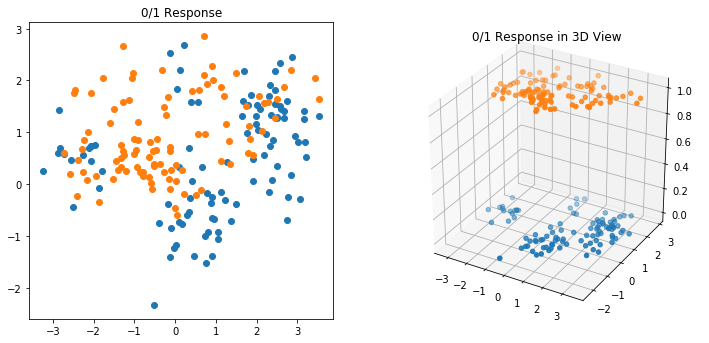

In [8]:
"""Plot the data"""
fig3 = plt.figure(3, figsize=(12, 12))
ax31 = fig3.add_subplot(2, 2, 1)
ax31.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax31.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
ax31.set_title('0/1 Response')

fig3_x_min, fig3_x_max = ax31.get_xlim()
fig3_y_min, fig3_y_max = ax31.get_ylim()

ax32 = fig3.add_subplot(2, 2, 2, projection='3d')
ax32.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax32.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')
ax32.set_title('0/1 Response in 3D View')

In [9]:
"""2D Linear regression implementation"""
mat_1x = scipy.hstack((scipy.ones((sample_size, 1)), sample_x))

# Solve (X^T*X)b = X^T*y for b,
# which is more efficient than computing an inverse matrix
hat_beta = scipy.linalg.solve((mat_1x.T @ mat_1x), (mat_1x.T @ sample_y))

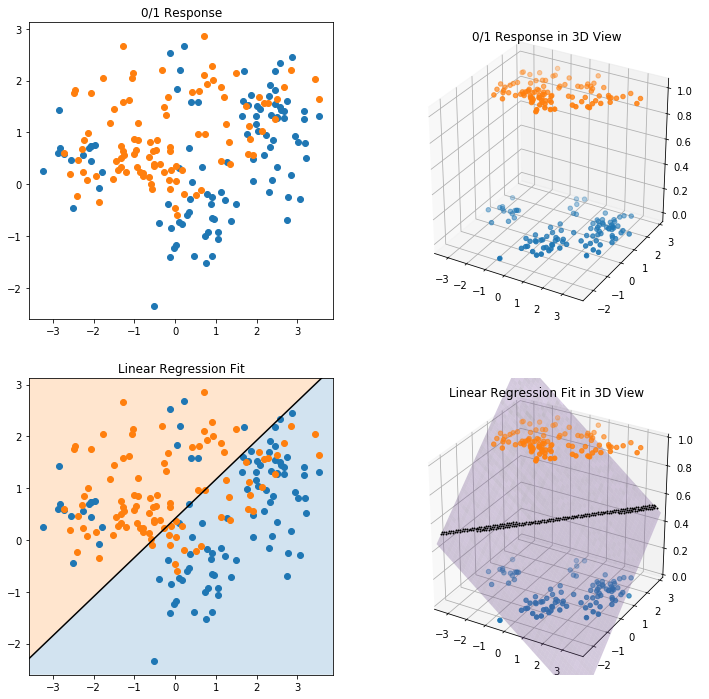

In [10]:
"""Plot the fit"""
ax33 = fig3.add_subplot(2, 2, 3)
ax33.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax33.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')

# Linear regression line for hat_y = 0.5
ols_line_y_min = (.5 - hat_beta[0] - fig3_x_min*hat_beta[1])/hat_beta[2]
ols_line_y_max = (.5 - hat_beta[0] - fig3_x_max*hat_beta[1])/hat_beta[2]
ax33.plot([fig3_x_min, fig3_x_max], [ols_line_y_min, ols_line_y_max], color='black')

# https://matplotlib.org/examples/pylab_examples/fill_between_demo.html
ax33.fill_between((fig3_x_min, fig3_x_max),
                  fig3_y_min,
                  (ols_line_y_min, ols_line_y_max),
                  facecolor='C0',
                  alpha=.2)
ax33.fill_between((fig3_x_min, fig3_x_max),
                  (ols_line_y_min, ols_line_y_max),
                  fig3_y_max,
                  facecolor='C1',
                  alpha=.2)
ax33.set_title('Linear Regression Fit')
ax33.set_xlim((fig3_x_min, fig3_x_max))
ax33.set_ylim((fig3_y_min, fig3_y_max))

ax34 = fig3.add_subplot(2, 2, 4, projection='3d')
ax34.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax34.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')

gridx = scipy.linspace(fig3_x_min, fig3_x_max, 100)
gridy = scipy.linspace(fig3_y_min, fig3_y_max, 100)

meshx, meshy = scipy.meshgrid(gridx, gridy)
meshz = scipy.array([
    [hat_beta @ (1, colx, coly) for colx, coly in zip(rowx, rowy)]
    for rowx, rowy in zip(meshx, meshy)
])
linez = scipy.array([
    (x, y, z)
    for x, y, z in zip(meshx.flatten(), meshy.flatten(), meshz.flatten())
    if scipy.isclose(z, .5, rtol=0, atol=1e-2)
])
ax34.plot_surface(meshx, meshy, meshz, color='C4', alpha=.3)
ax34.plot(linez[:, 0], linez[:, 1], linez[:, 2], 'o',
          color='black', markersize=1)
ax34.set_xlim((fig3_x_min, fig3_x_max))
ax34.set_ylim((fig3_y_min, fig3_y_max))
ax34.set_zlim((0, 1))
ax34.set_title('Linear Regression Fit in 3D View')
fig3

* The 3D plane is the actual linear regression fit, and
* the black line is the collection of the fitted values equal to 0.5. We set this line as a decision boundary to split the regions of BLUE and ORANGE.

### Indicator (Dummy) Variables

Is it perfect to set the decision boundary as the line of 0.5 fitted values? I don't know, but at least it seems natural to use the middle value of 0 and 1 as the split point. However we need to consider more cases.

1. As seen in the 3D plane fit, the fitted value $\hat{y}$ may be 0.3, -1.5, 120.123, or whatever. Values extremely distant from 0 or 1 make us worry about the 0.5 split, but in fact this is what we do in the binary classification.
1. Further assume that the discrete variable $G$ can take 0, 1, and 2.  
  With the same logic, we may split the decision boundary with the values 0.5 and 1.5. And the fitted value $\hat{y}$ may be 0.3, -1.5, 120.123, or whatever.  
  Wait, this is unfair. the region of $G=1$ is way narrower than other regions!

To resolve such issues, indicator variables are introduced and they consist of binary $Y_k$'s.

\begin{align}
G = 0 & \Longrightarrow & (Y_1, Y_2, Y_3) = (1,0,0) \\
G = 1 & \Longrightarrow & (Y_1, Y_2, Y_3) = (0,1,0) \\
G = 2 & \Longrightarrow & (Y_1, Y_2, Y_3) = (0,0,1)
\end{align}

Since there is no change in the training data $\mathbf{X}$ and only the additional output data are introduced, we can simply apply the linear regression to each of $Y_1$, $Y_2$, and $Y_3$ (in fact, one matrix computation is enough).

Then for some data point, we would get the estimate $\hat{y}_1$, $\hat{y}_2$, $\hat{y}_3$ and pick the category of the largest among them.

### Probability

Indicator variables bring the concept of probability in.

\begin{equation}
\text{E}(Y_k|X=x) = \text{Pr}(G=k|X=x)
\end{equation}

However the fitted values computed by the previous linear model do not satisfy the properties of probability (see the 3D plane fit above). Logistic regression resolves this issue.

## Logistic Regression

### Logit Transform, Logistic Transform


Here goes the logit transform.

\begin{equation}
\text{logit}: (0,1) \mapsto \mathbb{R} \\
\text{logit}(p) = \log\frac{p}{1-p}
\end{equation}

Since the logit transform is monotone and continuous, so is its inverse (logistic function).

\begin{equation}
\text{logistic}: \mathbb{R} \mapsto (0,1) \\
\text{logistic}(a) = \frac1{1+\exp(-a)} = \frac{\exp(a)}{\exp(a)+1}
\end{equation}

The below graph shows that the logistic transform is proper to change the real value to the probability-like value.

In [11]:
def logit(p:scipy.ndarray)->scipy.ndarray:
    return scipy.log(p/(1-p))


def logistic(a:scipy.ndarray)->scipy.ndarray:
    return scipy.reciprocal(1+scipy.exp(-a))

Text(0.5,1,'Logistic Function: Inverse of Logit')

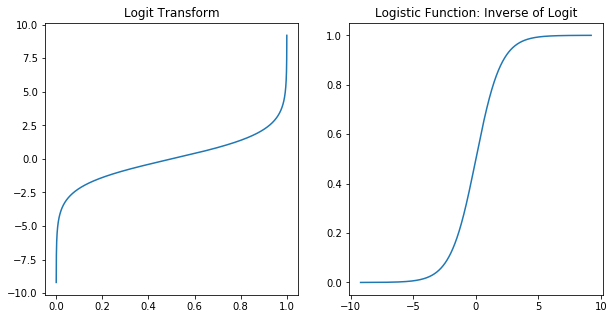

In [12]:
xgrid1 = scipy.linspace(0, 1, 10000, endpoint=False)[1:]
y_logitx = logit(xgrid1)

xgrid2 = y_logitx
y_logisticx = logistic(xgrid2)

fig5 = plt.figure(5, figsize=(10, 5))
ax51 = fig5.add_subplot(1, 2, 1)
ax51.plot(xgrid1, y_logitx)
ax51.set_title('Logit Transform')

ax52 = fig5.add_subplot(1, 2, 2)
ax52.plot(xgrid2, y_logisticx)
ax52.set_title('Logistic Function: Inverse of Logit')

### Formulation

We can write the linear regression problem with indicator variables as follows.

\begin{align}
\text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{Pr}(G=K|X=x) &= \beta_{K0} + \beta_{K1} x \\
\end{align}

And it is previously mentioned that these linear combinations do not satisfy the probabilistic properties. So the logistic transform cuts in here to help.

\begin{align}
\text{logit } \text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{logit } \text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{logit } \text{Pr}(G=K-1|X=x) &= \beta_{(K-1)0} + \beta_{(K-1)1} x
\\
\text{Pr}(G=K|X=x) &= 1- \sum_{k=1}^{K-1}\text{Pr}(G=k|X=x)
\end{align}

This is the logistic regression problem.

Now, the procedure to compute the estimate of $\beta$ gets more complicated because the nonlinear function is introduced in the problem. The below implementation uses the Newton-Raphson method to minimize the loss in the iterative manner.

In [13]:
"""Logistic regression

Please check any textbook for the detail of the algorithm
(I refer to the page 121 of ESL, Section 4.4)."""
def fvec_p(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the vector p, the vector of fitted probabilties"""
    num = scipy.exp(mat_x@vec_beta)
    return num/(num+1)


def fdiag_W(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the diagonal element of W"""
    vec_p = fvec_p(mat_x, vec_beta)
    return vec_p*(1-vec_p)

In [14]:
# initialization for iteration
lg_size_beta = 3
lg_hat_beta = scipy.zeros(lg_size_beta)
lg_beta_increment = scipy.ones(lg_size_beta)

# Newton-Raphson iteration
while (lg_beta_increment*lg_beta_increment).sum() > 1e-8:
    vec_p = fvec_p(mat_1x, lg_hat_beta)
    gradient = mat_1x.T @ (sample_y-vec_p)
    hessian = mat_1x.T @ scipy.diag(fdiag_W(mat_1x, lg_hat_beta)) @ mat_1x

    try:
        lg_beta_increment = scipy.linalg.solve(hessian, gradient)
    except scipy.linalg.LinAlgError:
        break
    
    lg_hat_beta += lg_beta_increment

Text(0.5,0.92,'Logistic Regression Fit in 3D View')

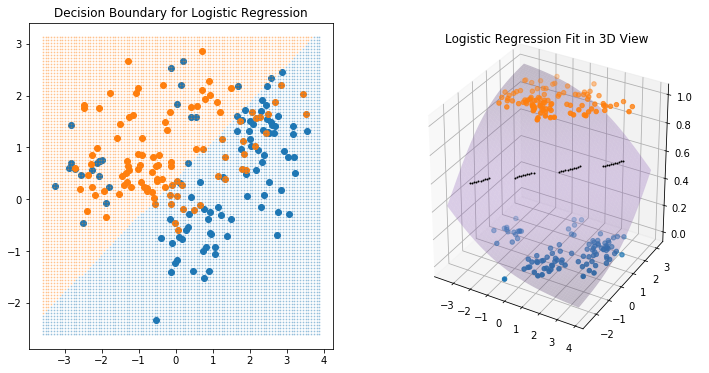

In [15]:
# Plot and compare
gridpair = scipy.array([[1, x, y]
                        for x in gridx
                        for y in gridy])
lg_z_pred = logistic(gridpair @ lg_hat_beta)
lg_pred = scipy.where(lg_z_pred > .5, 1, 0)

fig4 = plt.figure(4, figsize=(12, 6))
ax41 = fig4.add_subplot(1, 2, 1)
ax41.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax41.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
ax41.plot(gridpair[lg_pred == 0, 1], gridpair[lg_pred == 0, 2], 'o',
          color='C0', alpha=.3, markersize=1)
ax41.plot(gridpair[lg_pred == 1, 1], gridpair[lg_pred == 1, 2], 'o',
          color='C1', alpha=.3, markersize=1)
ax41.set_title('Decision Boundary for Logistic Regression')

ax42 = fig4.add_subplot(1, 2, 2, projection='3d')
ax42.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax42.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')

meshz = scipy.array([
    [lg_hat_beta @ (1, colx, coly) for colx, coly in zip(rowx, rowy)]
    for rowx, rowy in zip(meshx, meshy)
])
ax42.plot_surface(meshx, meshy, logistic(meshz), color='C4', alpha=.3)

linez = scipy.array([
    (x, y, z)
    for x, y, z in zip(meshx.flatten(), meshy.flatten(), meshz.flatten())
    if scipy.isclose(z, .5, rtol=0, atol=1e-2)
])
ax42.plot(linez[:, 0], linez[:, 1], linez[:, 2], 'o',
          color='black', markersize=1)
ax42.set_title('Logistic Regression Fit in 3D View')

We can see that the logistic regression compute the beautiful fit within the range between 0 and 1 for the binary classification problem (what currently we are dealing with). Then the decision boundary of the 0.5 split becomes much more plausible. Also note that the linearity of the decision boundary is also preserved.

For more detail, you may check the other [article](./why-is-logistic-regression-called-linear-method.ipynb).

# Finally, Neural Networks

Finally it's time for neural networks. Let's start with the simplest one, the single layer perceptron model.

\begin{align}
Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
T_k &= \beta_{0k} + \beta_k^T Z, & k=1,\cdots,K, \\
Y_k &= f_k(X) = g_k(T), & k=1,\cdots,K,
\end{align}

where
* $Z$ and $T$ are vectors of $Z_m$'s and $T_k$'s, respectively:  
  $Z^T = [Z_1, \cdots, Z_M]$,  
  $T^T = [T_1, \cdots, T_K]$
* $\sigma$ is called activation function,
* $g_k$ is called output function.
* The hidden layer $Z$ is between the input layer $X$ and the output layer $Y$.
* Each node of a layer is called a unit.

Below is the famous figure of the single layer perceptron.

<img alt="schematic of a single hidden layer, feed-forward neural network" src="fig11-2-neural-network.jpg" />

* Only one unit is enough for the output layer if we want to solve the regression problem.
* If it is the $K$-class classification problem, the output layer contains $K$ indicator variables $Y_1, \cdots, Y_K$ representing the possibility for each class.

From now on, we study what the spider-web-like network does step-by-step.

## Make It Simple, Stupid

It is quite difficult, at least for me, to comprehend the complete flow of the neural network by the above figure and the model formula. It helps a lot to reduce the problem into the simpler ones.

### No Activation Function $\Longrightarrow$ Linear Models

We first throw away the $\sigma$.

\begin{equation}
\sigma(x) = x
\end{equation}

Then the neural network model is much simplified to a linear model.

The output function may confuse us in that the the reduced model is not linear because the output function $g$ is nonlinear. Note that, as the name tells itself, the output function transforms the output, not the input (Consider [why the logitstic regression is classified as a linear method](//dgkim5360.github.io/blog/machine%20learning/2018/02/why-is-logistic-regression-called-linear-method)).

#### $\Longrightarrow$ Linear regression

Here we make a bold move to remove the hidden layer. Why not? Also it would be worth thinking how the structure of the network changes.

* No hidden layer, no $\beta$.
* Leave only one unit in the output layer, $K=1$.
* No output function, $g(x) = x$.

Then the network exactly comes down to a linear regression model.

\begin{align}
T &= \alpha_0 + \alpha^T X, \\
Y &= f(X) = T
\end{align}

#### $\Longrightarrow$ Logistic regression

Now adding the output function $g$ as a logistic function yields the logistic regression model for the binary classification problem.

\begin{align}
T &= \alpha_0 + \alpha^T X, \\
Y &= f(X) = g(T) = \frac{1}{1+\exp{(-T)}}
\end{align}

Note that in the context of neural networks world, the logistic function is called the sigmoid function.

If we raise $K > 1$, the logistic regression model can solve the $K$-class classification problem.

\begin{align}
T_k &= \alpha_{0k} + \alpha_k^T X, & k=1,\cdots,K-1, \\
Y_k &= f_k(X) = g(T_k), & k=1,\cdots,K-1, \\
Y_K &= 1 - \sum_{k=1}^{K-1} Y_k
\end{align}

I would like to just mention that the softmax output function can do almost the same job.

### Activation $\Longrightarrow$ Basis Expansion

We have confirmed that, without activation functions, the neural networks are simplified to linear models. Now we check how it goes if the activation is alive. To focus on the activation functions, we still minimize the remaining settings.

* The activation function $\sigma$ and the number of hidden units $M$ come in.
* Assume $K=1$ and no output function, $g(x) = x$.

\begin{align}
Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
T &= \beta_0 + \beta^T Z, \\
Y &= f(X) = T
\end{align}

Except the fact that the activation function $\sigma$ is universally used for all $m$, this network resembles the basis expansion model. In other words, the hidden layer units chase the nonlinearity based on the input units just like the basis functions do (So $Z$ is also called _derived feature_).

## Activation vs. Basis Expansion

If we intentionally set the each activation function as a custom function like

\begin{align}
Z_1 &= X^2, \\
Z_2 &= X^3,
\end{align}

then the network is the same as the basis expansion model. The basis expansion models set the compulsory setting. That is, in the perspective of neural networks, all the activations $\sigma$ and all the values of the coefficients $\alpha$ are completely fixed from the scratch.

In the analogy of parenting style, __the basis expansion is the helicopter mom, while the neural network mom is hand-off parenting style__. What should we decide in order to construct the neural network model?
* Activation function $\sigma$,
* The number of hidden units $M$,
* Output function $g_k$

The neural network mom seems to care her children more than we thought (~~What a love of mother~~). With $M$ hidden units decided, these units grow on their own as the time does on. In other words, the values of $\alpha$ keep adjusted to fit the training data in an iterative manner (the iterative optimization is inevitable due to nonlinearities of the model).

In the meantime, we still need to decide the fine settings of the model like below:
* which activation and output function to be used,
* how the information propagates between layers (e.g. setting neighborhoods within which the information propagates only).

We can see from the famous MNIST example that the results are totally different depending on how the network consist of.


### Who wins?

~~So if you can pick, which mom do you prefer?~~

No, this is not the appropriate question. Since we here have to assess the model, the proper question is "which parenting style is better?"

Suppose that their children has success in whatever sense.

#### Basis expansion
The helicopter mom can say that the success came from her strategy. It is due to her plans and schedules for her children.
* She decides which variables and their transformations by her hand.
* The reasoning of such decision comes from the domain knowledge or insight of the data and the problem. It is very hard to achieve right.
* But the resulting model has clear meaning and is easy to interpret.
* Therefore the power of the model is mainly due to her strategy. In other words, she can have clear feedbacks from the result (good or bad).

#### Neural networks
How about the other side? The other mom may feel happy, but not knowing why the success is achieved (if she cares). Maybe her child was born to succeed.
* The units of hidden layers automatically develop themselves, adjusting from the given data.
* The training procedure is relatively easier than the helicopter mom. For instance, we may compare testing various $M$ with testing more various combinations of basis functions.
* Since the core units grow on their own, the model is opaque and has no clear meaning to humans.

Compared to the statstical learning models which are based on the definite relation, the black-box-characteristic of neural networks is its obvious disadvantage. While, compared again, the flexibility of neural networks is also obvious advantage.

## Implementation with PyTorch

As mentioned from the start, this notebook does not address how to train the neural network model. To do this, the concept of _loss_ should be introduced much earlier, and that explanation may result in another article.

The code goes on though. Here the single layer perceptron is trained for the previous 2D example. This notebook uses PyTorch, one of famous deep-learning libraries.

### Why PyTorch?

The reason why this notebook tries to use numpy/scipy only is
1. to minimize the load to learn the usage of external frameworks,
1. to show more clearly how the learning procedure goes.

However, in the case of neural networks, we need to implement from scratch every training algorithm depending on activation functions and output functions. If we want to make such procedure (computing gradient) more universally possible, then the resulting implementation would more or less the same as PyTorch.

PyTorch contains its core modules `torch`, `torch.autograd`, `torch.nn`.
* `torch` provides its basic data type `Tensor`. This is a `numpy.array`-like tensor library with GPU support.  
  If we are capable, it is possible to implement the neural network model only with `torch.Tensor`. What we need to do is to compute the gradient of the loss.
* `torch.autograd` does the job -- computing gradients.  
  If we are capable, it is again possible to implement the model with `torch.Tensor` and `torch.autograd`. Then the implementation of various activations, output functions, and loss functions is required.
* `torch.nn` does the job. It contains such mathematics and provides the blocks to build neural networks.

Here this notebook exploits all the framework provides to implement the below examples:
1. A linear regression model without hidden layers
1. A logistic regression model without hidden layers
1. A neural network model with 1 hidden layer, 6 hidden units, and sigmoid activation + sigmoid output

In [16]:
import torch

In [17]:
class Logistic(torch.nn.Module):
    def __init__(self, p, k):
        super(Logistic, self).__init__()
        self.lin = torch.nn.Linear(p, k, bias=True)
        
    def forward(self, inputs):
        outputs = self.lin(inputs)
        outputs = torch.nn.functional.sigmoid(outputs)
        return outputs


class SingleLayerPerceptron(torch.nn.Module):
    def __init__(self, p, m, k):
        super(SingleLayerPerceptron, self).__init__()
        self.lin1 = torch.nn.Linear(p, m, bias=True)
        self.lin2 = torch.nn.Linear(m, k, bias=True)
    
    def forward(self, inputs):
        outputs = self.lin1(inputs)
        outputs = torch.nn.functional.sigmoid(outputs)
        outputs = self.lin2(outputs)
        return torch.nn.functional.sigmoid(outputs)

In [18]:
# Constant variables
n, p, m, k = 200, 2, 6, 1
learning_rate = 1e-4
niter = 50000

# Training data for PyTorch
torch_x = torch.autograd.Variable(torch.from_numpy(sample_x).float())
torch_y = torch.autograd.Variable(torch.from_numpy(sample_y.reshape(-1, 1)).float(),
                                  requires_grad=False)
    
# Training models and their associated loss functions
net1_linear = torch.nn.Linear(p, k, bias=True)        
lossfunc1 = torch.nn.MSELoss(size_average=False)

net2_logistic = Logistic(p, k)
lossfunc2 = torch.nn.BCELoss(size_average=False)

net3_neural = SingleLayerPerceptron(p, m, k)
lossfunc3 = torch.nn.BCELoss(size_average=False)

In [19]:
%%time
"""Neural network training"""
# 1. Linear regression
for epoch in range(niter):
    # Forward pass
    y_pred1 = net1_linear(torch_x)
    
    # Compute loss
    loss1 = lossfunc1(y_pred1, torch_y)
    
    # Zero the gradients before running backward pass
    net1_linear.zero_grad()
    
    # Backward pass
    loss1.backward()
    
    # Update the weights using gradient descent
    for param in net1_linear.parameters():
        param.data -= learning_rate*param.grad.data

CPU times: user 4.53 s, sys: 467 ms, total: 5 s
Wall time: 4.87 s


In [20]:
%%time
# 2. Logistic regression
for epoch in range(niter):
    # Forward pass
    y_pred2 = net2_logistic(torch_x)
    
    # Compute loss
    loss2 = lossfunc2(y_pred2, torch_y)
    
    # Zero the gradients before running backward pass
    net2_logistic.zero_grad()
    
    # Backward pass
    loss2.backward()
    
    # Update the weights using gradient descent
    for param in net2_logistic.parameters():
        param.data -= learning_rate*param.grad.data

CPU times: user 6.43 s, sys: 578 ms, total: 7.01 s
Wall time: 6.83 s


In [21]:
%%time
# 3. Neural network with 6 hidden units
for epoch in range(niter):
    # Forward pass
    y_pred3 = net3_neural(torch_x)
    
    # Compute loss
    loss3 = lossfunc3(y_pred3, torch_y)
    
    # Zero the gradients before running backward pass
    net3_neural.zero_grad()
    
    # Backward pass
    loss3.backward()
    
    # Update the weights using gradient descent
    for param in net3_neural.parameters():
        param.data -= learning_rate*param.grad.data

CPU times: user 24 s, sys: 794 ms, total: 24.8 s
Wall time: 12.7 s


In [22]:
torchgrid = torch.autograd.Variable(torch.from_numpy(gridpair[:, 1:]).float(),
                                    requires_grad=False)
net1pred = net1_linear(torchgrid)
net1out = scipy.where(net1pred.data.numpy() >= .5, 1, 0).flatten()

net2pred = net2_logistic(torchgrid)
net2out = scipy.where(net2pred.data.numpy() >= .5, 1, 0).flatten()

net3pred = net3_neural(torchgrid)
net3out = scipy.where(net3pred.data.numpy() >= .5, 1, 0).flatten()

Text(0.5,0.92,'Neural Network in 3D View')

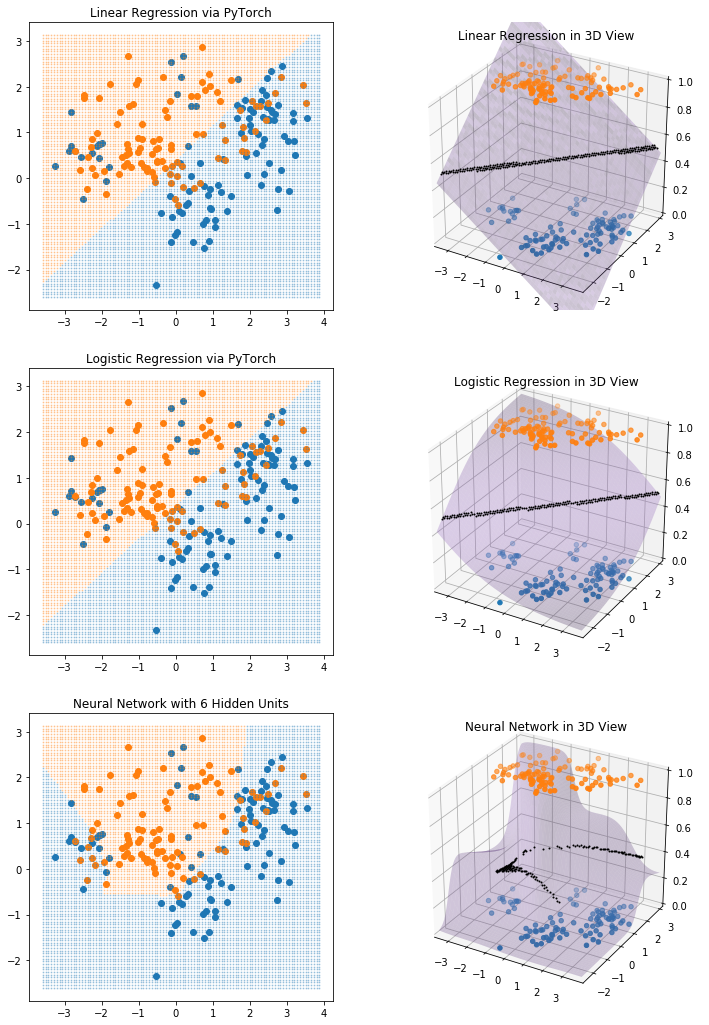

In [23]:
# Plot and compare
fig5 = plt.figure(5, figsize=(12, 18))
ax51 = fig5.add_subplot(3, 2, 1)

ax51.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax51.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
ax51.plot(gridpair[net1out == 0, 1], gridpair[net1out == 0, 2], 'o',
          color='C0', alpha=.3, markersize=1)
ax51.plot(gridpair[net1out == 1, 1], gridpair[net1out == 1, 2], 'o',
          color='C1', alpha=.3, markersize=1)
ax51.set_title('Linear Regression via PyTorch')

ax52 = fig5.add_subplot(3, 2, 2, projection='3d')
ax52.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax52.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')
meshz1 = net1pred.data.numpy().reshape(100, 100).T
ax52.plot_surface(meshx, meshy, meshz1, color='C4', alpha=.3)

linez1 = scipy.array([
    (x, y, z)
    for x, y, z in zip(meshx.flatten(), meshy.flatten(), meshz1.flatten())
    if scipy.isclose(z, .5, rtol=0, atol=1e-2)
])
ax52.plot(linez1[:, 0], linez1[:, 1], linez1[:, 2], 'o',
          color='black', markersize=1)

ax52.set_xlim((fig3_x_min, fig3_x_max))
ax52.set_ylim((fig3_y_min, fig3_y_max))
ax52.set_zlim((0, 1))
ax52.set_title('Linear Regression in 3D View')

ax53 = fig5.add_subplot(3, 2, 3)
ax53.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax53.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
ax53.plot(gridpair[net2out == 0, 1], gridpair[net2out == 0, 2], 'o',
          color='C0', alpha=.3, markersize=1)
ax53.plot(gridpair[net2out == 1, 1], gridpair[net2out == 1, 2], 'o',
          color='C1', alpha=.3, markersize=1)
ax53.set_title('Logistic Regression via PyTorch')

ax54 = fig5.add_subplot(3, 2, 4, projection='3d')
ax54.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax54.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')
meshz2 = net2pred.data.numpy().reshape(100, 100).T
ax54.plot_surface(meshx, meshy, meshz2, color='C4', alpha=.3)

linez2 = scipy.array([
    (x, y, z)
    for x, y, z in zip(meshx.flatten(), meshy.flatten(), meshz2.flatten())
    if scipy.isclose(z, .5, rtol=0, atol=1e-2)
])
ax54.plot(linez2[:, 0], linez2[:, 1], linez2[:, 2], 'o',
          color='black', markersize=1)

ax54.set_xlim((fig3_x_min, fig3_x_max))
ax54.set_ylim((fig3_y_min, fig3_y_max))
ax54.set_zlim((0, 1))
ax54.set_title('Logistic Regression in 3D View')

ax55 = fig5.add_subplot(3, 2, 5)
ax55.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax55.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
ax55.plot(gridpair[net3out == 0, 1], gridpair[net3out == 0, 2], 'o',
          color='C0', alpha=.3, markersize=1)
ax55.plot(gridpair[net3out == 1, 1], gridpair[net3out == 1, 2], 'o',
          color='C1', alpha=.3, markersize=1)
ax55.set_title('Neural Network with 6 Hidden Units')

ax56 = fig5.add_subplot(3, 2, 6, projection='3d')
ax56.scatter(sample_blue[:, 0], sample_blue[:, 1], 0, 'o', color='C0')
ax56.scatter(sample_orange[:, 0], sample_orange[:, 1], 1, 'o', color='C1')
meshz3 = net3pred.data.numpy()
ax56.plot_surface(meshx, meshy, meshz3.reshape(100, 100).T, color='C4', alpha=.3)

linez3 = scipy.array([
    (x, y, z)
    for x, y, z in zip(meshx.flatten(), meshy.flatten(), meshz3.flatten())
    if scipy.isclose(z, .5, rtol=0, atol=1e-2)
])
ax56.plot(linez3[:, 0], linez3[:, 1], linez3[:, 2], 'o',
          color='black', markersize=1)

ax56.set_xlim((fig3_x_min, fig3_x_max))
ax56.set_ylim((fig3_y_min, fig3_y_max))
ax56.set_zlim((0, 1))
ax56.set_title('Neural Network in 3D View')

The neural network model gave us the awesome decision boundary that we haven't seen before. However note that fitting well of the training data and performing well on the test data is a whole another different story. There are a lot of theoretical and practical studies for this. Maybe a future article continues on philosophy of training and testing (i.e., the model assessment).

Here ends the journey to understand the basics of neural networks. This is the tip of the iceberg, and the real-world application uses much more complex networks like CNN and RNN (especially LSTM). Keep study and practice!